In [138]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [124]:
df = pd.read_csv('Car details v3.csv')

In [125]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [129]:
df.shape

(8128, 13)

In [160]:
df1 = df

In [97]:
df.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [161]:
df1 = df1.dropna()

In [162]:
df1=df1.drop(['name'],axis=1)

In [163]:
df1['Current_year'] = 2021

In [164]:
df1['car_age'] = df1['Current_year'] - df1['year']

In [165]:
df1=df1.drop(['year', 'Current_year'],axis=1)

In [166]:
df1.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,car_age
0,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,7
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,7
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,15
3,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,11
4,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,14


In [167]:
df1 = pd.get_dummies(df1, prefix=['fuel', 'seller_type', 'transmission', 'owner'], columns = ['fuel', 'seller_type', 'transmission', 'owner'], drop_first = True)

In [168]:
df1.shape

(7906, 18)

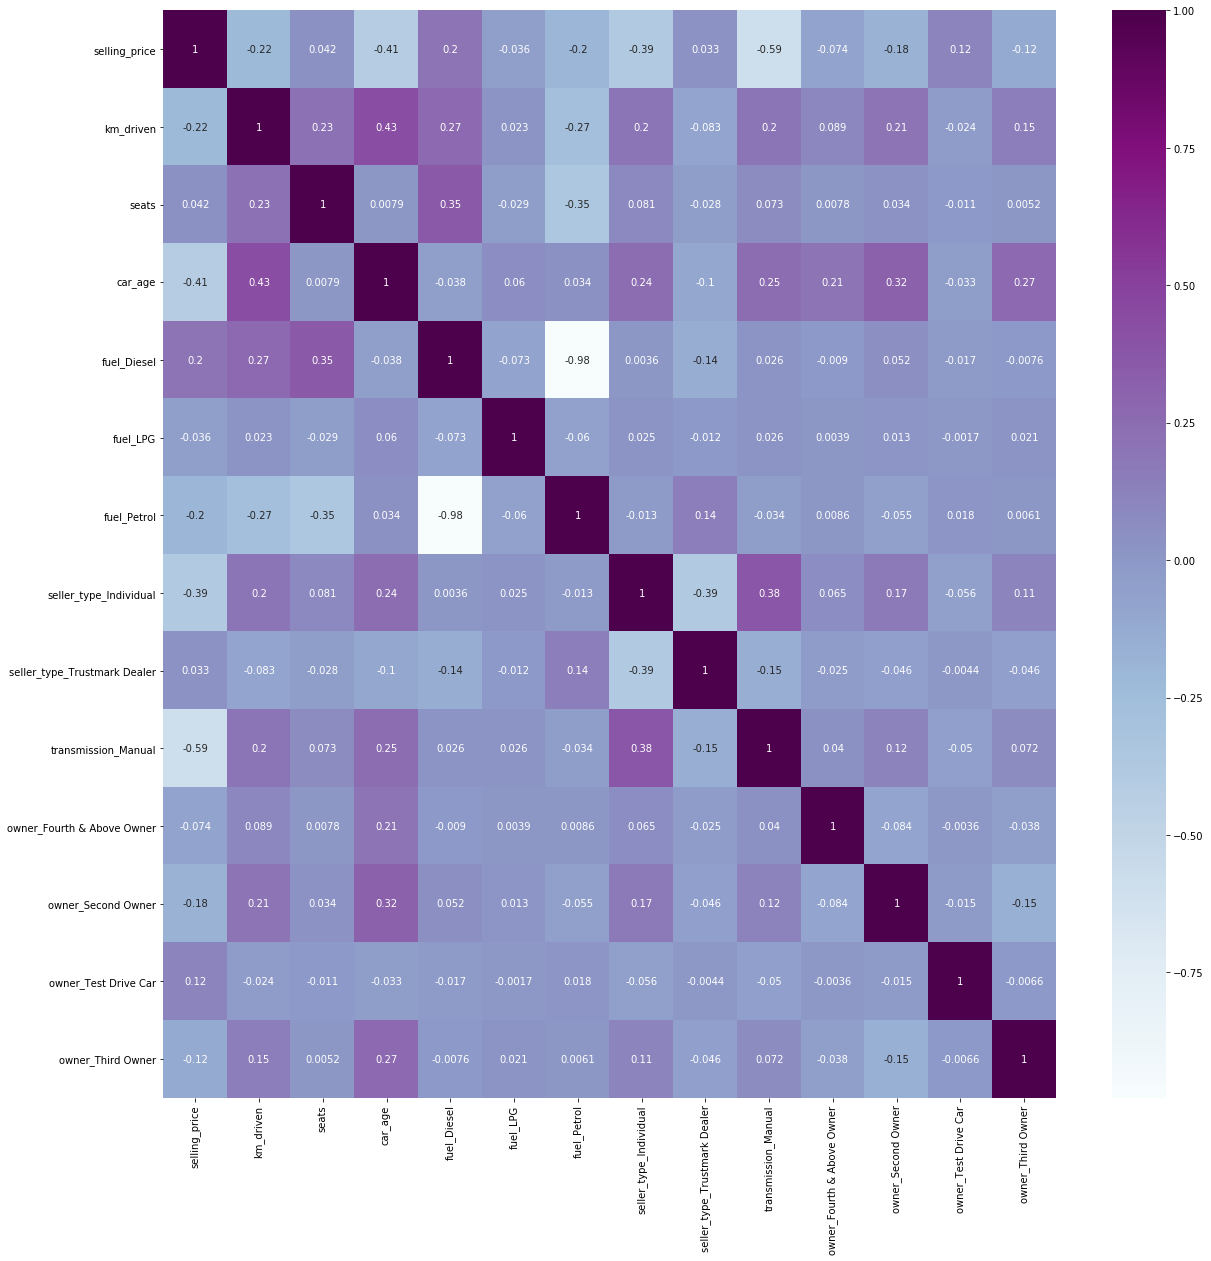

In [169]:
corr = df1.corr()
top_corr = corr.index
plt.figure(figsize=(20,20))
g = sn.heatmap(df1[top_corr].corr(), annot=True, cmap = 'BuPu')

In [173]:
x = df1.iloc[:,1:]
Y = df1.iloc[:,0]

In [174]:
x.head()

,km_driven,seats,car_age,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,145500,5.0,7,1,0,0,1,0,1,0,0,0,0
1,120000,5.0,7,1,0,0,1,0,1,0,1,0,0
2,140000,5.0,15,0,0,1,1,0,1,0,0,0,1
3,127000,5.0,11,1,0,0,1,0,1,0,0,0,0
4,120000,5.0,14,0,0,1,1,0,1,0,0,0,0


In [146]:
from sklearn.ensemble import ExtraTreesRegressor

In [172]:
df1 = df1.drop(['mileage', 'engine', 'max_power', 'torque'], axis=1)

In [175]:
model = ExtraTreesRegressor()
model.fit(x, Y)
imp_feat = pd.Series(model.feature_importances_, index = x.columns)

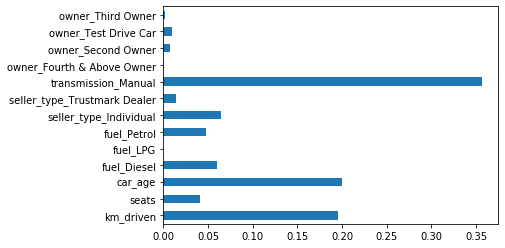

In [176]:
imp_feat.plot(kind='barh')
plt.show()

In [177]:
from sklearn.model_selection import train_test_split

In [179]:
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size = 0.2)

In [185]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

In [192]:
rf_model = RandomForestRegressor()

In [187]:
n_estimators = [int(x) for x in np.linspace(100, 1200, 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [188]:
random_grid = {'n_estimators': n_estimators,
              'max_features': max_features, 
              'max_depth': max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [193]:
rf = RandomizedSearchCV(estimator = rf_model, param_distributions = random_grid, scoring = 'neg_mean_squared_error', n_iter = 10, cv = 5, random_state = 42)

In [194]:
rf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error')

In [195]:
pred = rf.predict(X_test)

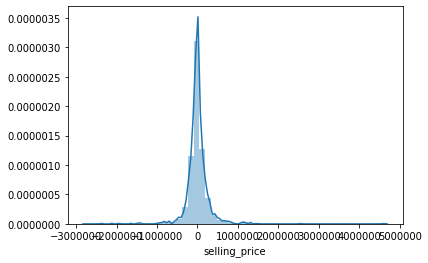

In [196]:
sn.distplot(y_test - pred)

In [197]:
import pickle

In [198]:
file = open('random_forest_regression_model.pkl', 'wb')
pickle.dump(rf, file)


In [199]:
import flask

In [201]:
import jsonify

ModuleNotFoundError: No module named 'jsonify'

In [202]:
import requests

In [203]:
df1.head()

,selling_price,km_driven,seats,car_age,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,450000,145500,5.0,7,1,0,0,1,0,1,0,0,0,0
1,370000,120000,5.0,7,1,0,0,1,0,1,0,1,0,0
2,158000,140000,5.0,15,0,0,1,1,0,1,0,0,0,1
3,225000,127000,5.0,11,1,0,0,1,0,1,0,0,0,0
4,130000,120000,5.0,14,0,0,1,1,0,1,0,0,0,0


In [204]:
X_train.head()

,km_driven,seats,car_age,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
971,90000,7.0,7,1,0,0,1,0,1,0,1,0,0
7744,5000,5.0,2,0,0,1,1,0,0,0,0,0,0
3877,21500,5.0,4,0,0,1,1,0,0,0,0,0,0
4611,101200,7.0,7,1,0,0,1,0,1,0,1,0,0
5224,20000,5.0,4,0,0,1,1,0,1,0,0,0,0


In [207]:
X_train.columns

Index(['km_driven', 'seats', 'car_age', 'fuel_Diesel', 'fuel_LPG',
       'fuel_Petrol', 'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission_Manual', 'owner_Fourth & Above Owner',
       'owner_Second Owner', 'owner_Test Drive Car', 'owner_Third Owner'],
      dtype='object')

In [208]:
import jsonify